IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


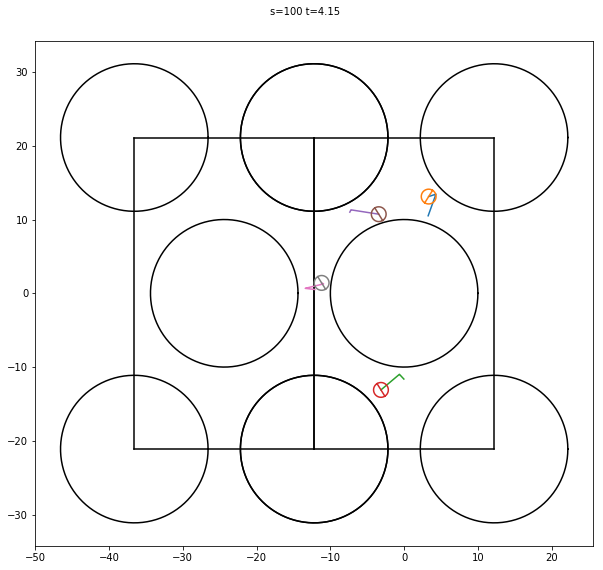

In [7]:
%matplotlib inline
seed = 10
dim = 2
%run -i billiard_defs.py

R_particle = 1
R_scatter = 10
R = R_particle + R_scatter
gap_crit = (2/np.sqrt(3) - 1) * R
gap = 0.7 * gap_crit

x_0 = R + gap
y_0 = np.sqrt(3) * x_0

wall = [FlatWall(dim=dim, base_point=[-x_0, 0], normal=[1, 0], tangents=[0, y_0], collision_law='wrap', wrap_dim=0, wrap_wall=1)
        ,FlatWall(dim=dim, base_point=[x_0, 0], normal=[-1, 0], tangents=[0, -y_0], collision_law='wrap', wrap_dim=0, wrap_wall=0)
        ,FlatWall(dim=dim, base_point=[0, -y_0], normal=[0, 1], tangents=[-x_0, 0], collision_law='wrap', wrap_dim=1, wrap_wall=3)
        ,FlatWall(dim=dim, base_point=[0, y_0], normal=[0, -1], tangents=[x_0, 0], collision_law='wrap', wrap_dim=1, wrap_wall=2)
        ,SphereWall(dim=dim, base_point=[0,0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[-x_0, -y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[x_0, -y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[-x_0, y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[x_0, y_0], radius=R_scatter, gap_pad=R_particle)
       ]
for (i, w) in enumerate(wall):
    w.idx = i

x = [[x_0/2, y_0/2], [-x_0/2, y_0/2], [-x_0/2, -y_0/2], [x_0/2, -y_0/2]]
part = Particles(max_steps=10, cell_size=[x_0, y_0], dim=dim, num=4, mass=3, radius=R_particle)
part.set_pos_init()#x)
part.set_vel_init()#x)
part.set_orient_init()
part.set_spin_init()

run_trial(wall, part)
smoother(part, min_frames=1)
# draw_hist(wall, part)

anim = animate(num_frames=100, fps=60)
HTML(anim.to_jshtml())
# anim.save('anim.mp4')

In [1]:
%matplotlib inline
seed = 10
dim = 2
%run -i billiard_defs.py

R_particle = 1
R_scatter = 10
R = R_particle + R_scatter
gap_crit = (2/np.sqrt(3) - 1) * R
gap = 0.7 * gap_crit

x_0 = R + gap
y_0 = np.sqrt(3) * x_0

wall = [FlatWall(dim=dim, base_point=[-x_0, 0], normal=[1, 0], tangents=[0, y_0], collision_law='wrap', wrap_dim=0, wrap_wall=1)
        ,FlatWall(dim=dim, base_point=[x_0, 0], normal=[-1, 0], tangents=[0, -y_0], collision_law='wrap', wrap_dim=0, wrap_wall=0)
        ,FlatWall(dim=dim, base_point=[0, -y_0], normal=[0, 1], tangents=[-x_0, 0], collision_law='wrap', wrap_dim=1, wrap_wall=3)
        ,FlatWall(dim=dim, base_point=[0, y_0], normal=[0, -1], tangents=[x_0, 0], collision_law='wrap', wrap_dim=1, wrap_wall=2)
        ,SphereWall(dim=dim, base_point=[0,0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[-x_0, -y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[x_0, -y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[-x_0, y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[x_0, y_0], radius=R_scatter, gap_pad=R_particle)
       ]
for (i, w) in enumerate(wall):
    w.idx = i

#x = [[x_0/2, y_0/2], [-x_0/2, y_0/2], [-x_0/2, -y_0/2], [x_0/2, -y_0/2]]
part = Particles(max_steps=100, cell_size=[x_0, y_0], dim=dim, num=1, mass=3, radius=R_particle)
part.set_pos_init([[x_0,0]])#x)
part.set_vel_init([[-1,0]])#x)
part.set_orient_init()
part.set_spin_init([5])

run_trial(wall, part)
smoother(part, max_distort=20)
# draw_hist(wall, part)


anim = animate(num_frames=100, fps=60)
HTML(anim.to_jshtml())
# anim.save('anim')
# # anim
# ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t));



# anim.save('anim.mp4')

TypeError: smoother() got an unexpected keyword argument 'max_distort'